### Import, pickle and comparison of transcriptomes

Transcriptome according to Shah/Plotkin (http://www.sciencedirect.com/science/article/pii/S0092867413006557) (drawn randomly from Ingolia (2009)):

In [1]:
import matplotlib as mpl
mpl.use("pgf")
%matplotlib inline
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)

In [2]:
{f.name for f in mpl.font_manager.fontManager.ttflist}

{u'Adobe Caslon Pro',
 u'Adobe Garamond Pro',
 u'Algerian',
 u'Arial',
 u'Arial Unicode MS',
 u'Baskerville Old Face',
 u'Bauhaus 93',
 u'Bell MT',
 u'Berlin Sans FB',
 u'Berlin Sans FB Demi',
 u'Bernard MT Condensed',
 u'Bitstream Vera Sans',
 u'Bitstream Vera Sans Mono',
 u'Bitstream Vera Serif',
 u'Bodoni MT',
 u'Book Antiqua',
 u'Bookman Old Style',
 u'Bookshelf Symbol 7',
 u'Britannic Bold',
 u'Broadway',
 u'Brush Script MT',
 u'Calibri',
 u'Californian FB',
 u'Cambria',
 u'Candara',
 u'Centaur',
 u'Century',
 u'Century Gothic',
 u'Chiller',
 u'Colonna MT',
 u'Comic Sans MS',
 u'Consolas',
 u'Constantia',
 u'Cooper Black',
 u'Corbel',
 u'Courier New',
 u'EB Garamond',
 u'EB Garamond 12 All SC',
 u'EB Garamond SC',
 u'Ebrima',
 u'Envy Code R',
 u'Envy Code R VS',
 u'Footlight MT Light',
 u'Franklin Gothic Medium',
 u'Freestyle Script',
 u'Gabriola',
 u'Gadugi',
 u'Garamond',
 u'Georgia',
 u'Haettenschweiler',
 u'Harlow Solid Italic',
 u'Harrington',
 u'High Tower Text',
 u'HoloLens

In [3]:
{f.name for f in mpl.font_manager.fontManager.afmlist}

{'Computer Modern',
 'Courier',
 'Helvetica',
 'ITC Avant Garde Gothic',
 'ITC Bookman',
 'ITC Zapf Chancery',
 'ITC Zapf Dingbats',
 'New Century Schoolbook',
 'Palatino',
 'Symbol',
 'Times',
 'Utopia',
 'ZapfDingbats'}

c:\python27\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


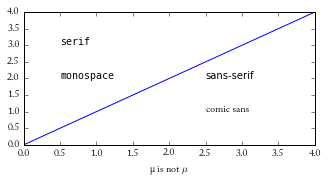

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4.5,2.5))
plt.plot(range(5))
plt.text(0.5, 3., "serif", family="monospace")
plt.text(0.5, 2., "monospace", family="monospace")
plt.text(2.5, 2., "sans-serif", family="sans-serif")
plt.text(2.5, 1., "comic sans", family=u'Adobe Caslon Pro')
plt.xlabel(u"µ is not $\\mu$")
plt.tight_layout(.5)

plt.savefig('example.pgf')

In [5]:
import os.path
import csv
import pandas as pd
import cPickle as pkl
import matplotlib.pyplot as plt

from matplotlib import rc

datadir = "../../data"

In [6]:
transcriptome_plotkin_file = "S.cer.mRNA.abndc.ini.tsv"
transcriptome_plotkin_path = os.path.join(datadir, transcriptome_plotkin_file)

transcriptome_plotkin = {}

with open(transcriptome_plotkin_path, mode='r') as tsvin:
    tsvin = csv.reader(tsvin, delimiter='\t')
    tsvin.next() # skip header

    for row in tsvin:
        ORF_name = row[0]
        count = int(row[2])
        transcriptome_plotkin[ORF_name] = count

In [7]:
data = transcriptome_plotkin.values()
pd.Series(data).describe()

count    4839.000000
mean       12.399256
std        45.559384
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      1283.000000
dtype: float64

In [8]:
sum(data)

60000

In [9]:
pkl.dump(transcriptome_plotkin, open("../../parameters/transcriptome_plotkin_old.p", "wb"))

Also create a smaller version of Plotkins transcriptome with approximately 20000 molecules (the range is 20000-60000 in http://book.bionumbers.org/how-many-mrnas-are-in-a-cell/):

In [10]:
transcriptome_plotkin_20000 = {key: int(transcriptome_plotkin[key]/3.0 + 0.5) for key in transcriptome_plotkin}

In [11]:
data = transcriptome_plotkin_20000.values()
pd.Series(data).describe()

count    4839.000000
mean        4.126679
std        15.191293
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       428.000000
dtype: float64

In [12]:
sum(data)

19969

In [13]:
pkl.dump(transcriptome_plotkin_20000, open("../../parameters/transcriptome_plotkin_20000.p", "wb"))

Transcriptome according to Lipson et al. (2009) (http://www.ncbi.nlm.nih.gov/pubmed/19581875), using single-molecule sequencing digital gene expression (smsDGE):

In [14]:
transcriptome_lipson_file = r"nbt.1551-S2.csv"
transcriptome_lipson_path = os.path.join(datadir, transcriptome_lipson_file)

transcriptome_lipson = {}

with open(transcriptome_lipson_path, mode='r') as infile:
    reader = csv.reader(infile)
    reader.next() # skip header line
    
    transcriptome_lipson = {rows[1]:int(float(rows[9].replace(',','.'))) for rows in reader} # (percentage of the) transcriptome
    #transcriptome_lipson = [(rows[1], rows[9]) for rows in reader] # (percentage of the) transcriptome
    #transcriptome_lipson = [rows for rows in reader] # (percentage of the) transcriptome


In [15]:
data = transcriptome_lipson.values()
pd.Series(data).describe()

count     6710.000000
mean       148.567809
std        582.981330
min          0.000000
25%         16.000000
50%         44.000000
75%         93.000000
max      15909.000000
dtype: float64

In [16]:
sum(data)

996890

In [17]:
pkl.dump(transcriptome_lipson, open("../../parameters/transcriptome_lipson.p", "wb"))

Transcriptome according to Pop (http://msb.embopress.org/content/10/12/770):

In [18]:
transcriptome_pop = pkl.load(open('../../parameters/transcriptome_pop_60000.p'))

In [19]:
data = transcriptome_pop.values()
pd.Series(data).describe()

count    2496.000000
mean       24.038462
std        71.459074
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max      1015.000000
dtype: float64

In [20]:
sum(data)

60000

Transcriptome according to  Siwiak/Zielenkiewicz (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000865#s5):

In [21]:
transcriptome_siwiak_file = r"journal.pcbi.1000865.s003.CSV"
transcriptome_siwiak_path = os.path.join(datadir, transcriptome_siwiak_file)

transcriptome_siwiak = {}

with open(transcriptome_siwiak_path, mode='r') as infile:
    reader = csv.reader(infile)
    reader.next() # skip header line
    
    transcriptome_siwiak = {rows[0]:int(float(rows[2]) + 0.5) for rows in reader}

In [22]:
data = transcriptome_siwiak.values()
pd.Series(data).describe()

count    4621.000000
mean        7.759143
std        28.522433
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       591.000000
dtype: float64

In [23]:
sum(data)

35855

In [24]:
pkl.dump(transcriptome_siwiak, open("../../parameters/transcriptome_siwiak.p", "wb"))

Transcriptome from Premal Shah in private email (Sept 30, 2015):

In [25]:
file_plotkin = r"weinberg_etal_data.tsv"
filepath_plotkin = os.path.join(datadir, file_plotkin)

with open(filepath_plotkin, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    transcriptome_shah = {elem[0]: int((float(elem[3].strip()) + 0.5) * 62250 / 891000)
                           for elem in content}

In [26]:
data = transcriptome_shah.values()
pd.Series(data).describe()

count    4839.000000
mean       12.400496
std        50.939523
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max      1381.000000
dtype: float64

In [27]:
sum(data)

60006

In [28]:
pkl.dump(transcriptome_shah, open("../../parameters/transcriptome_shah.p", "wb"))

Transcriptome from Miura et al. (http://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-9-574, file 6):

In [29]:
file_miura = r"Absolute_mRNA_Miura_etal_2008.csv"
filepath_miura = os.path.join(datadir, file_miura)
transcriptome_miura = {}

with open(filepath_miura, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    for elem in content:
        # case distinction for integers vs floats:
        if elem[2].strip()[1:-1]:
            transcriptome_miura[elem[0][1:-1]] = float(elem[2].strip()[1:-1])
        else:
            transcriptome_miura[elem[0][1:-1]] = float(elem[2].strip())

In [30]:
data = transcriptome_miura.values()
pd.Series(data).describe()

count    4287.000000
mean        6.423900
std        24.097212
min         0.040000
25%         0.610000
50%         1.350000
75%         3.345000
max       377.170000
dtype: float64

The sum is not 60000 but in the same order of magnitude and perhaps OK considering that 2/3 of the genes are not present:

In [31]:
sum(data)

27539.259999999984

In [32]:
pkl.dump(transcriptome_miura, open("../../parameters/transcriptome_miura.p", "wb"))

Transcriptome constructed by combining Lotte's and Aouefa's data and averaging over time:

In [33]:
transcriptome_teufel = pkl.load(open("../../parameters/transcriptome_teufel.p"))

In [34]:
data = transcriptome_teufel.values()
pd.Series(data).describe()

count    5585.000000
mean        6.412175
std        23.683885
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       628.000000
dtype: float64

In [35]:
sum(data)

35812

Scatterplot of transcriptomes:

In [36]:
df1 = pd.DataFrame.from_dict(transcriptome_plotkin.items())
df1.columns = ['name', '$n_\mathrm{Plotkin}$']

df2 = pd.DataFrame.from_dict(transcriptome_lipson.items())
df2.columns = ['name', '$n_\mathrm{Lipson}$']

df3 = pd.DataFrame.from_dict(transcriptome_pop.items())
df3.columns = ['name', '$n_\mathrm{Pop}$']

df4 = pd.DataFrame.from_dict(transcriptome_siwiak.items())
df4.columns = ['name', '$n_\mathrm{Siwiak}$']

df5 = pd.DataFrame.from_dict(transcriptome_shah.items())
df5.columns = ['name', '$n_\mathrm{Shah}$']

df6 = pd.DataFrame.from_dict(transcriptome_miura.items())
df6.columns = ['name', '$n_\mathrm{Miura}$']

df7 = pd.DataFrame.from_dict(transcriptome_teufel.items())
df7.columns = ['name', '$n_\mathrm{Teufel}$']

In [37]:
df = pd.merge(df1, df2, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df3, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df4, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df5, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df6, left_on='name', right_on='name', how='outer')
df = pd.merge(df, df7, left_on='name', right_on='name', how='outer')

c:\python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


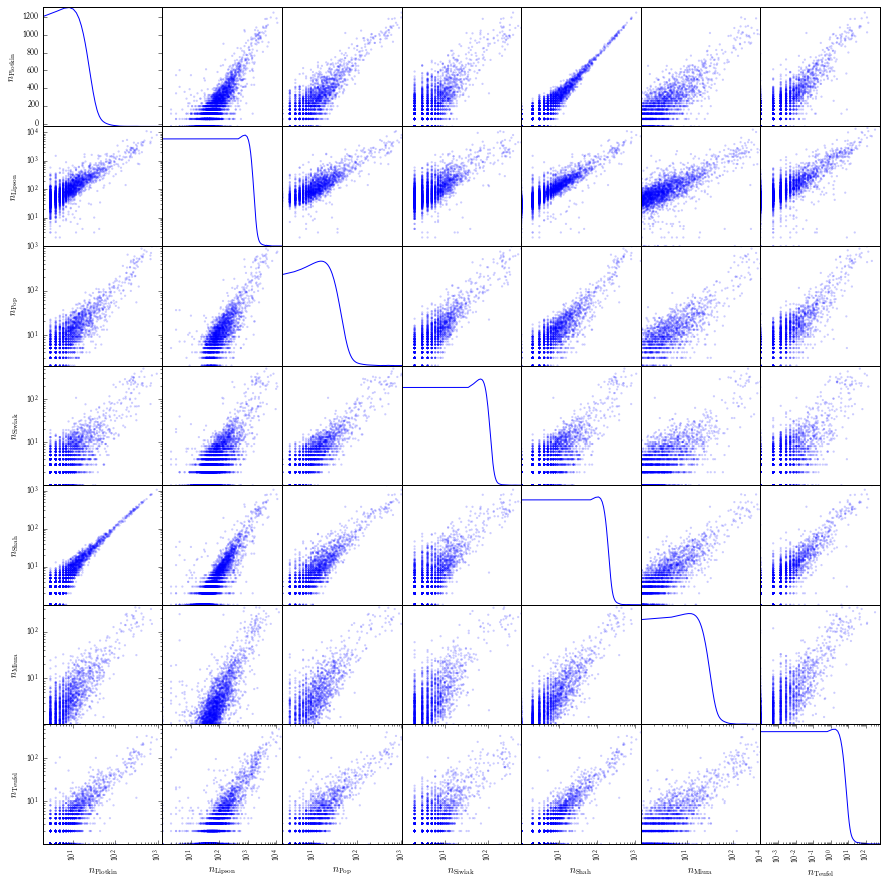

In [38]:
axl = pd.scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        mini = max(0.0001, df[df.columns[i+1]].min())
        minj = max(0.0001, df[df.columns[j+1]].min())
        if i != j:  # only the scatter plots
            # scale plot axes by their mins and maxs
            ax.set_xlim([minj+1, df[df.columns[j+1]].max()]) 
            ax.set_ylim([mini+1, df[df.columns[i+1]].max()])
            ax.set_xscale('log')
            ax.set_yscale('log')
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j+1]].max()])
            ax.set_xscale('log')            

c:\python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


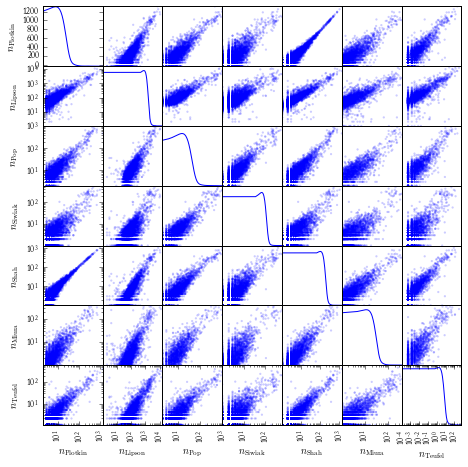

In [41]:
axl = pd.scatter_matrix(df, alpha=0.2, figsize=(7.5, 7.5), diagonal='kde', rasterized=True)

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        mini = max(0.0001, df[df.columns[i+1]].min())
        minj = max(0.0001, df[df.columns[j+1]].min())
        if i != j:  # only the scatter plots
            # scale plot axes by their mins and maxs
            ax.set_xlim([minj+1, df[df.columns[j+1]].max()]) 
            ax.set_ylim([mini+1, df[df.columns[i+1]].max()])
            ax.set_xscale('log')
            ax.set_yscale('log')
            #ax.set_rasterized(True)
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j+1]].max()])
            ax.set_xscale('log')   
            #ax.set_rasterized(True)
            
plt.savefig('transcriptomes_scatter_matrix.pgf')